### British American Airways Sentiment Analysis

In [41]:
# importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import seaborn

In [2]:
# scrapping data from the websiste
url = "https://www.airlinequality.com/airline-reviews/british-airways"
num_pages = 15
page_size = 100

reviews = []

# loop to scrap the pages:
for i in range(1, num_pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from data
    url = f"{url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collecting HTML data
    response = requests.get(url)

    # Parsing content
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    for sou in soup.find_all("div", {"class": "text_content"}):
        reviews.append(sou.get_text())
    
    print(f"Number of reviews: {len(reviews)}")

Scraping page 1
Number of reviews: 100
Scraping page 2
Number of reviews: 200
Scraping page 3
Number of reviews: 300
Scraping page 4
Number of reviews: 400
Scraping page 5
Number of reviews: 500
Scraping page 6
Number of reviews: 600
Scraping page 7
Number of reviews: 700
Scraping page 8
Number of reviews: 800
Scraping page 9
Number of reviews: 900
Scraping page 10
Number of reviews: 1000
Scraping page 11
Number of reviews: 1100
Scraping page 12
Number of reviews: 1200
Scraping page 13
Number of reviews: 1300
Scraping page 14
Number of reviews: 1400
Scraping page 15
Number of reviews: 1500


In [3]:
# converting list with reviews to dataframe
df = pd.DataFrame()
df['reviews'] = reviews
# previewing first 5 reviews
df.head()

,reviews
0,✅ Trip Verified | Very impressed with BA. Chec...
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
2,Not Verified | I flew from Malaga via LHR to...
3,✅ Trip Verified | Milan to Miami return via L...
4,✅ Trip Verified | BA created a new low-cost s...


In [4]:
# checking the shape
df.shape

print(f"The dataframe contains {df.shape[0]} reviews.")

The dataframe contains 1500 reviews.


After previewing the dataframe, we can see that there are words and symbols. We shall fo ahead and remove them.

In [5]:
df['reviews'] = df["reviews"].str.split("|", expand=True)[1]

In [6]:
# previewing the changes
df['reviews'].head()

0     Very impressed with BA. Check in online was a...
1      LHR - SFO, LAS - LGW August 2023 in Club Wor...
2       I flew from Malaga via LHR to Boston on the...
3      Milan to Miami return via London. Worst busi...
4      BA created a new low-cost subsidiary in BA E...
Name: reviews, dtype: object

We can also note that the reviews have special characters and numbers. We shall go ahead and remove all of them and just leave the text. 

In [7]:
# defining a function to clean the reviews
def clean_review(text):
  """
  This function cleans a review by converting it to lowercase and removing special characters.
  """
  # Convert to lowercase
  text = text.lower()

  # Remove special characters (keep alphanumeric and whitespace)
  pattern = r"[^\w\s]"  # Matches anything except alphanumeric characters and whitespace
  cleaned_text = re.sub(pattern, "", text)

  return cleaned_text


In [8]:
# applying the function
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

In [9]:
# previewing the changes
df['cleaned_reviews'].head()

0     very impressed with ba check in online was a ...
1      lhr  sfo las  lgw august 2023 in club world ...
2       i flew from malaga via lhr to boston on the...
3      milan to miami return via london worst busin...
4      ba created a new lowcost subsidiary in ba eu...
Name: cleaned_reviews, dtype: object

### SENTIMENT ANALYSIS

In this section we will go ahead and conduct a sentiment analysis from the data collected. The data will first go through pre-processing. The pre-processing will contain the following steps
##### Tokenization:
This is the breaking of the text into smaller chunks known as Tokens

##### POS Tagging:
This is the conversion of each token into a Tuple

##### Stopwords removal:
Stopwords are words which add little information to text.

##### Getting the Stem words:
This is done through Stemming and Lemmatization

In [16]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['cleaned_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\espym.LAPTOP-
[nltk_data]     41F90NSA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \espym.LAPTOP-41F90NSA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,cleaned_reviews,POS tagged
0,Very impressed with BA. Check in online was a...,very impressed with ba check in online was a ...,"[(impressed, a), (ba, a), (check, n), (online,..."
1,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu..."
2,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)..."
3,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No..."
4,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)..."


In [17]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data_reviews):
    lemma_rew = " "
    for word, pos in pos_data_reviews:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,cleaned_reviews,POS tagged,Lemma
0,Very impressed with BA. Check in online was a...,very impressed with ba check in online was a ...,"[(impressed, a), (ba, a), (check, n), (online,...",impressed ba check online little convoluted ...
1,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu...",lhr sfo la lgw august 2023 club world shame ...
2,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)...",fly malaga via lhr boston 4th may 2024 arriv...
3,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No...",milan miami return via london bad business c...
4,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)...",ba create new lowcost subsidiary ba euroflye...


In [19]:
df['Lemma'].head()

0      impressed ba check online little convoluted ...
1      lhr sfo la lgw august 2023 club world shame ...
2      fly malaga via lhr boston 4th may 2024 arriv...
3      milan miami return via london bad business c...
4      ba create new lowcost subsidiary ba euroflye...
Name: Lemma, dtype: object

In [21]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Very impressed with BA. Check in online was a...,impressed ba check online little convoluted ...
1,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo la lgw august 2023 club world shame ...
2,I flew from Malaga via LHR to Boston on the...,fly malaga via lhr boston 4th may 2024 arriv...
3,Milan to Miami return via London. Worst busi...,milan miami return via london bad business c...
4,BA created a new low-cost subsidiary in BA E...,ba create new lowcost subsidiary ba euroflye...
...,...,...
1495,Quick bag drop at First Wing but too many pa...,quick bag drop first wing many passenger use...
1496,4 Hours before takeoff we received a Mail st...,4 hour takeoff receive mail state cryptic me...
1497,I recently had a delay on British Airways fr...,recently delay british airway bru lhr due st...
1498,"Boarded on time, but it took ages to get to ...",board time take age get runway due congestio...


## Sentiment Analysis using Vader

VADER is short for Valence Aware Dictionary and Sentiment Reasoner. This library is used to classify sentiments as negative, positive coupled with the emotion the sentiment carries

In [22]:
# installing the library
! pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ------ --------------------------------- 20.5/126.0 kB ? eta -:--:--
   ---------------------- ---------------- 71.7/126.0 kB 115.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 

In [25]:
# importing the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# function to calculate sentiment
def sentiment_analysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [29]:
# Applying changes to the column
df['Sentiment'] = df['Lemma'].apply(sentiment_analysis)

In [30]:
# defining function to analyze the sentiment
def analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(analysis)

In [32]:
# previewing the changes
df.head(10)

,reviews,cleaned_reviews,POS tagged,Lemma,Sentiment,Analysis
0,Very impressed with BA. Check in online was a...,very impressed with ba check in online was a ...,"[(impressed, a), (ba, a), (check, n), (online,...",impressed ba check online little convoluted ...,0.9888,Positive
1,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu...",lhr sfo la lgw august 2023 club world shame ...,0.9382,Positive
2,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)...",fly malaga via lhr boston 4th may 2024 arriv...,-0.7184,Negative
3,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No...",milan miami return via london bad business c...,-0.9036,Negative
4,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)...",ba create new lowcost subsidiary ba euroflye...,0.9913,Positive
5,I flew with British Airways from Heathrow t...,i flew with british airways from heathrow t...,"[(flew, v), (british, a), (airways, n), (heath...",fly british airway heathrow hannover althoug...,-0.8992,Negative
6,Manchester to Copenhagen via London on 30th ...,manchester to copenhagen via london on 30th ...,"[(manchester, n), (copenhagen, v), (via, None)...",manchester copenhagen via london 30th april ...,0.4215,Neutral
7,I have never seen such disrespect to a custo...,i have never seen such disrespect to a custo...,"[(never, r), (seen, v), (disrespect, n), (cust...",never see disrespect customer 3rd time 2 mon...,-0.3331,Negative
8,Paid for a 14 hour long flight ticket which ...,paid for a 14 hour long flight ticket which ...,"[(paid, v), (14, None), (hour, n), (long, r), ...",pay 14 hour long flight ticket include use i...,-0.5734,Negative
9,Very inconsiderate PA announcements were mad...,very inconsiderate pa announcements were mad...,"[(inconsiderate, a), (pa, n), (announcements, ...",inconsiderate pa announcement make purser ap...,-0.9686,Negative


### Visualization Using Word Cloud

In [34]:
! pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/301.4 kB 640.0 kB/s eta 0:00

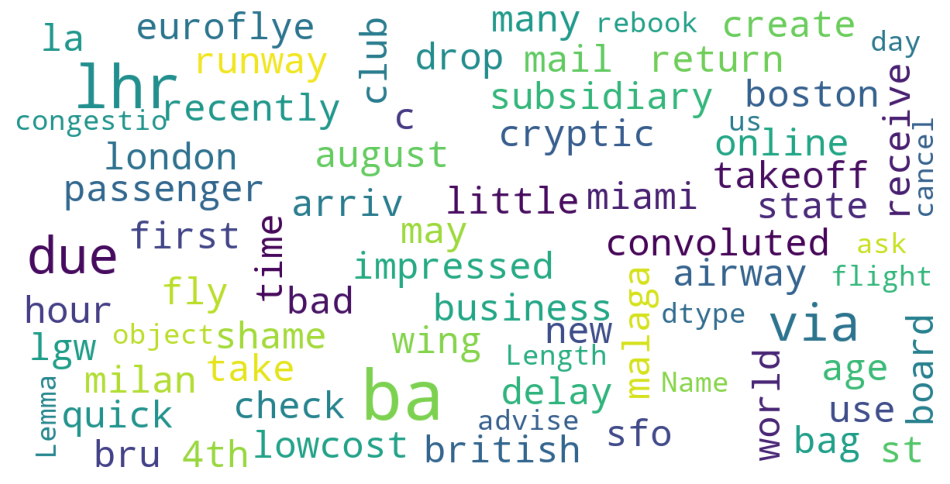

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [45]:
vader_value_counts = df['Analysis'].value_counts()
vader_value_counts

Analysis
Positive    735
Negative    570
Neutral     195
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1c07a242870>,
 [Text(0.03455180204558485, 1.0994572174374968, 'Positive'),
  Text(-0.4683571759915193, -0.9953097787609891, 'Negative'),
  Text(1.238968752705047, -0.5361496337968534, 'Neutral')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.0%'),
  Text(-0.2554675505408287, -0.5428962429605395, '38.0%'),
  Text(0.7800914368883629, -0.3375756953535744, '13.0%')])

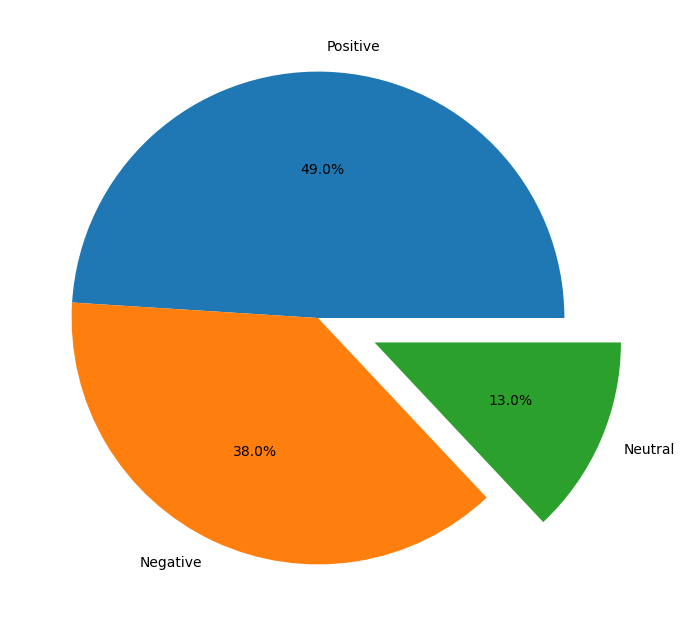

In [50]:
# visualizing in a piechart
pallete_color = seaborn.color_palette('bright')

plt.figure(figsize=(10,8))
plt.pie(vader_value_counts.values, labels = vader_value_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)